# Chat Auswertung
___

In [1]:
from __future__ import unicode_literals
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import re
import os
import sys
import datetime
import common.chat
import common.live

In [2]:
#config
reload(sys)
sys.setdefaultencoding('utf-8')
matplotlib.style.use('ggplot')
%matplotlib inline

#constants
CHAT_DATA_DIRECTORY = '/home/marcel/Development/rbtvdata/chat'
LIVE_DATA_DIRECTORY = '/home/marcel/Development/rbtvdata/live'

## Chat Daten
___

In [3]:
#load chat data
chat = common.chat.load(CHAT_DATA_DIRECTORY)

#create additional columns
chat['day'] = chat.index.date

In [4]:
chat.head()

,username,message,day
datetime,,,
2015-08-05 02:00:09,tadloss,!sendeplan,2015-08-05
2015-08-05 02:00:09,moobot,Angaben zum aktuellen Programm findet Ihr: Auf...,2015-08-05
2015-08-05 02:00:10,dersendeplan,@tadloss (01:00) Blue Estate >> (02:30) Darkes...,2015-08-05
2015-08-05 02:00:17,dedalos_stormbring,"@Gunvolf, Brav. Kappa",2015-08-05
2015-08-05 02:00:18,unclesreefermadness,ist da nicht schmatzen gäng und ein kompliment,2015-08-05


In [5]:
chat.tail()

,username,message,day
datetime,,,
2016-09-25 00:00:28,+Albi S.,300 k hype,2016-09-25
2016-09-25 00:00:32,Nishigo42,is außerdem die linke hand,2016-09-25
2016-09-25 00:00:32,RBean 91,periscope.tv/w/1MnGnndLewdGO,2016-09-25
2016-09-25 00:00:35,Der Diddler,rechne mit einer Woche und mehr,2016-09-25
2016-09-25 00:00:45,Der Diddler,kommt drauf an wie schlimm es ist,2016-09-25


In [6]:
#prepare chat data
chatFiltered = chat

#group messages by date
chatGrouped = chatFiltered.groupby('day')

#count messages
chatMessages = chatGrouped.size().to_frame('messages')

#adjust data type
chatMessages = chatMessages.set_index(pd.to_datetime(chatMessages.index, format='%Y-%m-%d'))

#resample
chatMessages = chatMessages.resample('1D').mean().fillna(0)

#30-day mean
chatMessages['messages_30d_mean'] = chatMessages.rolling(window=30, min_periods=1).mean()

chatMessages

,messages,messages_30d_mean
day,,
2015-08-05,74920.0,74920.000000
2015-08-06,59002.0,66961.000000
2015-08-07,71042.0,68321.333333
2015-08-08,64953.0,67479.250000
2015-08-09,30040.0,59991.400000
2015-08-10,19527.0,53247.333333
2015-08-11,32904.0,50341.142857
2015-08-12,35465.0,48481.625000
2015-08-13,35095.0,46994.222222


In [7]:
#prepare chat data
chatFiltered = chat

#group messages by date
chatGrouped = chatFiltered.groupby('day')

#count (unique) users
chatParticipants = chatGrouped.agg({'username': pd.Series.nunique})
chatParticipants.columns = ['participants']

#adjust data type
chatParticipants = chatParticipants.set_index(pd.to_datetime(chatParticipants.index, format='%Y-%m-%d'))

#resample
chatParticipants = chatParticipants.resample('1D').mean().fillna(0)

#30-day mean
chatParticipants['participants_30d_mean'] = chatParticipants.rolling(window=30, min_periods=1).mean()

chatParticipants

,participants,participants_30d_mean
day,,
2015-08-05,8634.0,8634.000000
2015-08-06,6565.0,7599.500000
2015-08-07,6982.0,7393.666667
2015-08-08,6173.0,7088.500000
2015-08-09,3868.0,6444.400000
2015-08-10,2895.0,5852.833333
2015-08-11,4122.0,5605.571429
2015-08-12,4232.0,5433.875000
2015-08-13,3980.0,5272.333333


## Live Daten
___

In [8]:
#load live data
live = common.live.load(LIVE_DATA_DIRECTORY)

#create additional column
live['day'] = live.index.date

In [9]:
live.head()

,viewers,day
datetime,,
2015-01-15 18:37:00,757.000000,2015-01-15
2015-01-15 18:38:00,2379.166667,2015-01-15
2015-01-15 18:39:00,10490.000000,2015-01-15
2015-01-15 18:40:00,13232.000000,2015-01-15
2015-01-15 18:41:00,13232.000000,2015-01-15


In [10]:
live.tail()

,viewers,day
datetime,,
2016-09-24 23:56:00,1888.0,2016-09-24
2016-09-24 23:57:00,1869.0,2016-09-24
2016-09-24 23:58:00,1862.0,2016-09-24
2016-09-24 23:59:00,1865.0,2016-09-24
2016-09-25 00:00:00,1839.0,2016-09-25


In [11]:
#prepare live data
liveFiltered = live

#group messages by date
liveGrouped = live.groupby('day')

#calculate mean for each day
liveMean = liveGrouped.apply(lambda group: group['viewers'].mean())
liveMean = liveMean.to_frame('viewers')

#adjust data type
liveMean = liveMean.set_index(pd.to_datetime(liveMean.index, format='%Y-%m-%d'))

#30-day mean
liveMean['viewers_30d_mean'] = liveMean.rolling(window=30, min_periods=1).mean()

liveMean

,viewers,viewers_30d_mean
day,,
2015-01-15,39952.809155,39952.809155
2015-01-16,15516.815972,27734.812564
2015-01-17,10723.801336,22064.475488
2015-01-18,9714.508345,18976.983702
2015-01-19,9311.282143,17043.843390
2015-01-20,10514.771755,15955.664784
2015-01-21,12030.206944,15394.885093
2015-01-22,11261.631944,14878.228449
2015-01-23,10431.520139,14384.149748


In [12]:
#join data
joinedData = chatParticipants.join(liveMean)

#participants/viewers ratio
joinedData['ratio'] = joinedData['participants'] / joinedData['viewers']

#30-day mean
joinedData['ratio_30d_mean'] = joinedData['ratio'].rolling(window=30, min_periods=1).mean()

joinedData

,participants,participants_30d_mean,viewers,viewers_30d_mean,ratio,ratio_30d_mean
day,,,,,,
2015-08-05,8634.0,8634.000000,8340.548432,4579.040970,1.035184,1.035184
2015-08-06,6565.0,7599.500000,7601.338194,4681.783904,0.863664,0.949424
2015-08-07,6982.0,7393.666667,6499.343750,4696.399691,1.074262,0.991037
2015-08-08,6173.0,7088.500000,5996.974288,4755.519552,1.029352,1.000616
2015-08-09,3868.0,6444.400000,3790.958333,4760.643603,1.020322,1.004557
2015-08-10,2895.0,5852.833333,3324.626389,4760.497212,0.870775,0.982260
2015-08-11,4122.0,5605.571429,4055.067361,4678.037860,1.016506,0.987152
2015-08-12,4232.0,5433.875000,4570.020833,4664.761911,0.926035,0.979513
2015-08-13,3980.0,5272.333333,4245.817361,4638.246494,0.937393,0.974833


## Diagramme
___

(0, 140000.0)

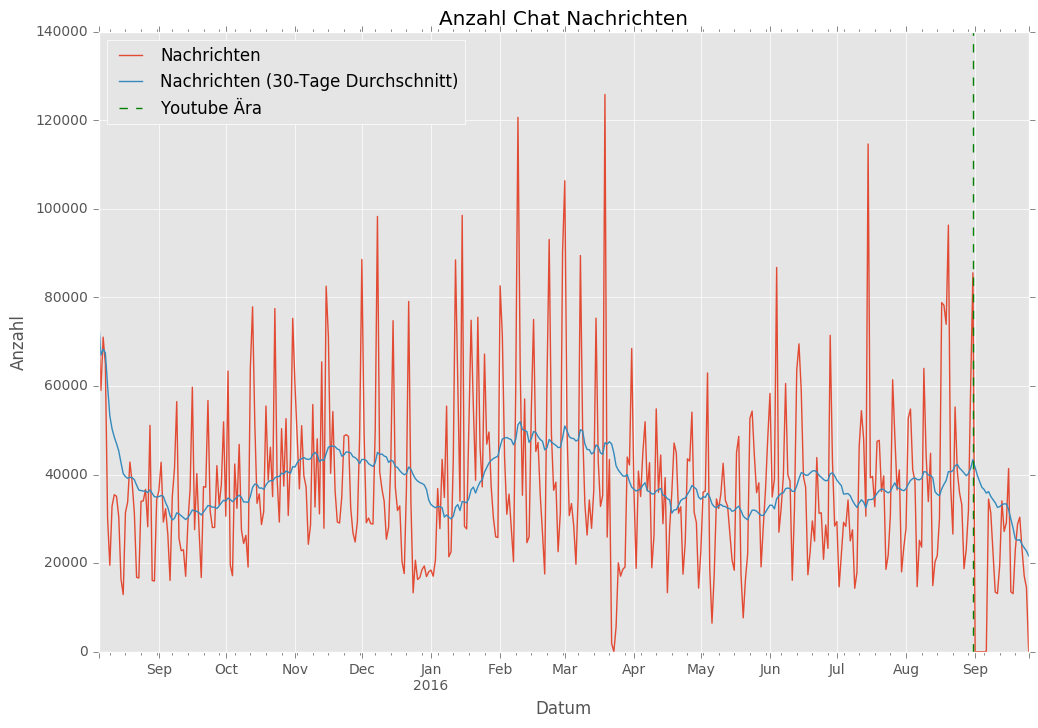

In [13]:
plot = chatMessages.plot(figsize=(12, 8), title='Anzahl Chat Nachrichten')
plot.set_xlabel('Datum')
plot.set_ylabel('Anzahl')

plot.axvline(datetime.datetime(2016, 8, 31, 23, 59, 59), color='g', linestyle='--', label='Youtube Ära')

legend = plot.legend(loc=2)
legend.get_texts()[0].set_text('Nachrichten')
legend.get_texts()[1].set_text('Nachrichten (30-Tage Durchschnitt)')

plt.ylim(ymin=0)

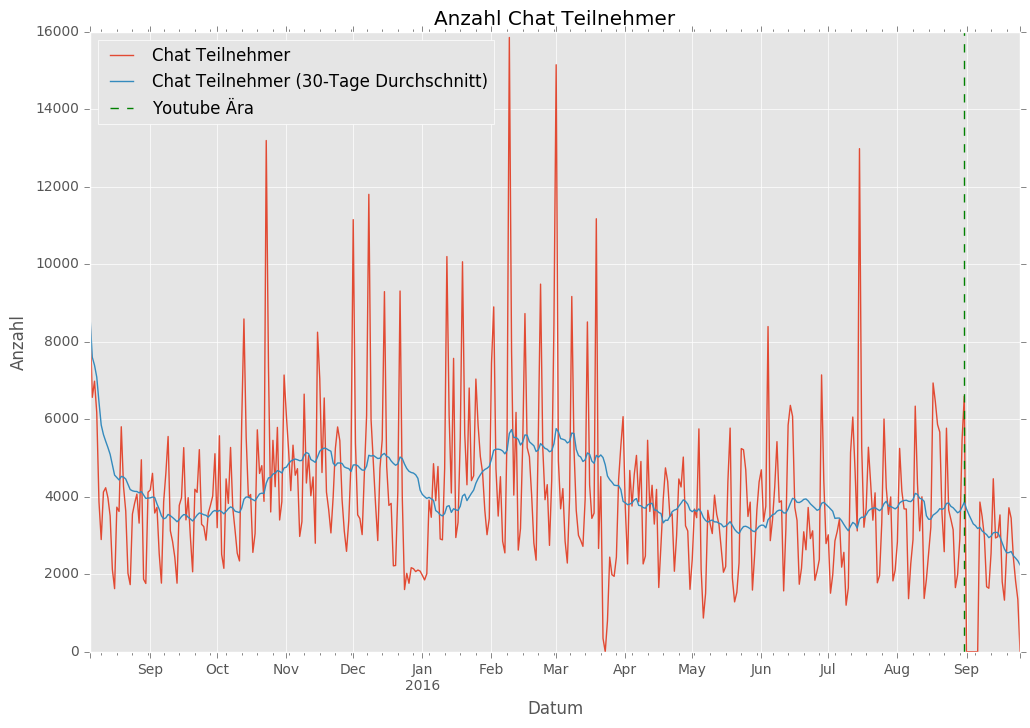

In [14]:
plot = chatParticipants.plot(kind='line', figsize=(12, 8), title='Anzahl Chat Teilnehmer')
plot.set_xlabel('Datum')
plot.set_ylabel('Anzahl')

plot.axvline(datetime.datetime(2016, 8, 31, 23, 59, 59), color='g', linestyle='--', label='Youtube Ära')

legend = plot.legend(loc=2)
legend.get_texts()[0].set_text('Chat Teilnehmer')
legend.get_texts()[1].set_text('Chat Teilnehmer (30-Tage Durchschnitt)')

plt.ylim(ymin=0)

plot

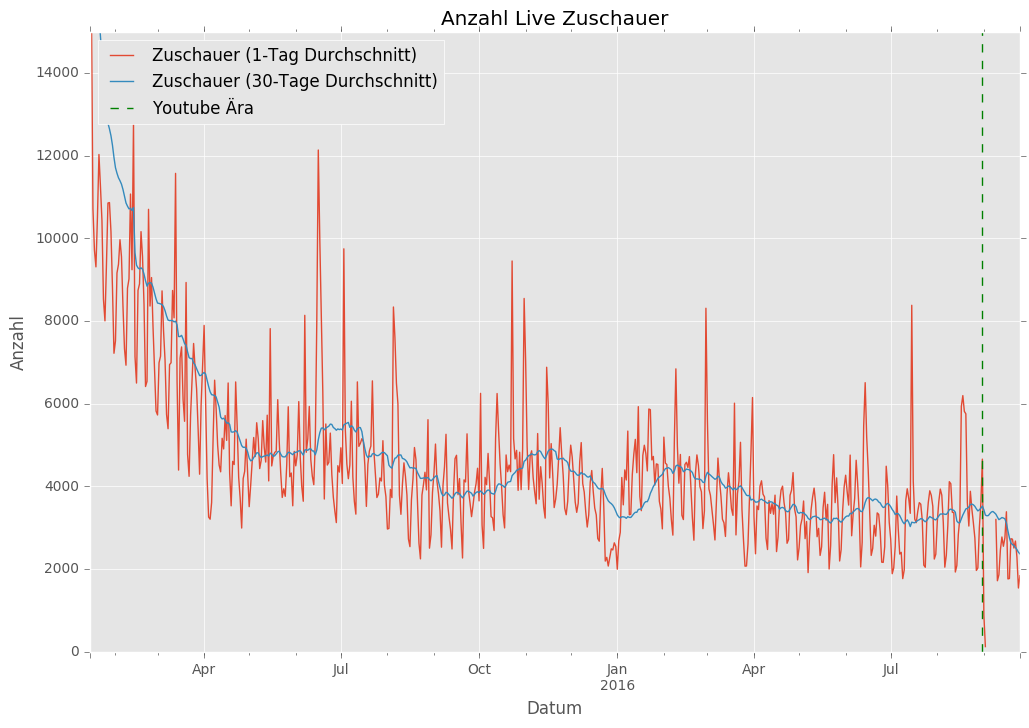

In [15]:
plot = liveMean.plot(figsize=(12, 8), title='Anzahl Live Zuschauer')
plot.set_xlabel('Datum')
plot.set_ylabel('Anzahl')

plot.axvline(datetime.datetime(2016, 8, 31, 23, 59, 59), color='g', linestyle='--', label='Youtube Ära')

legend = plot.legend(loc=2)
legend.get_texts()[0].set_text('Zuschauer (1-Tag Durchschnitt)')
legend.get_texts()[1].set_text('Zuschauer (30-Tage Durchschnitt)')

plt.ylim(ymin=0)
plt.ylim(ymax=15000)

plot

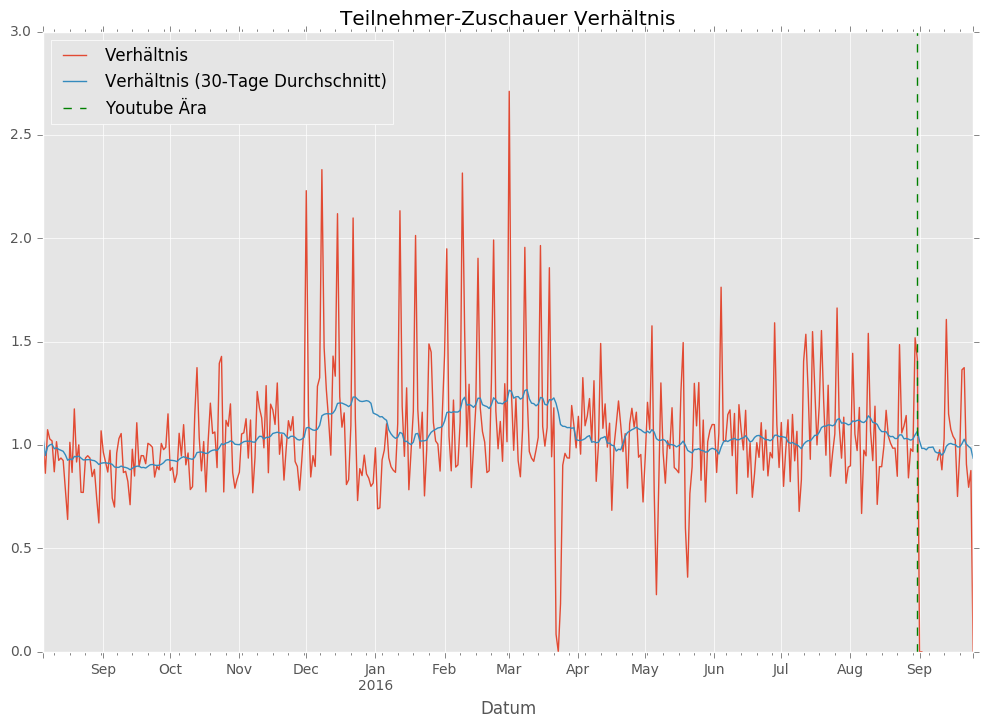

In [16]:
plot = joinedData[['ratio', 'ratio_30d_mean']].plot(figsize=(12, 8), title='Teilnehmer-Zuschauer Verhältnis')
plot.set_xlabel('Datum')

plot.axvline(datetime.datetime(2016, 8, 31, 23, 59, 59), color='g', linestyle='--', label='Youtube Ära')

legend = plot.legend(loc=2)
legend.get_texts()[0].set_text('Verhältnis')
legend.get_texts()[1].set_text('Verhältnis (30-Tage Durchschnitt)')

plt.ylim(ymin=0)

plot